### Instrucciones generales <a class="tocSkip"></a>

1. Forme un grupo de **máximo dos estudiantes**
1. Versione su trabajo usando un **repositorio <font color="red">privado</font> de github**. Agregue a su compañero y a su profesor (usuario github: phuijse) en la pestaña *Settings/Manage access*. No se aceptaran consultas si la tarea no está en github. No se evaluarán tareas que no estén en github.
1. Se evaluará el **resultado, la profundidad de su análisis y la calidad/orden de sus códigos** en base al último commit antes de la fecha y hora de entrega". Se bonificará a quienes muestren un método de trabajo incremental y ordenado según el histórico de *commits*
1. Sean honestos, ríganse por el [código de ética de la ACM](https://www.acm.org/about-acm/code-of-ethics-in-spanish)


# Tarea 1: Análisis de señales usando la FFT

Para esta tarea considere la señal adjunta guardada en el archivo `elefante_ruidoso.dat`

Esta señal tiene valores complejos y fue muestreada a $100$ [Hz]

In [1]:
import numpy as np
with open('elefante_ruidoso.npy', 'rb') as f:
    x = np.load(f)

In [2]:
display(x.shape)
display(x.dtype)
display(x[0])

(2000,)

dtype('complex128')

(9.904140158308326-23.73106678046714j)

## Pregunta 1: Análisis preliminar (20%)

Responda
- ¿Cuántas muestras tiene la señal? ¿Cuál es la duración o largo temporal de la señal? 


In [3]:
n_muestras = len(x)
Fs = 100
duracion = n_muestras / Fs
print(f' La señal posee {n_muestras} muestras')
print(f' La duración de la señal es de {duracion}[s]')

 La señal posee 2000 muestras
 La duración de la señal es de 20.0[s]


- ¿Cuál es la mayor frecuencia que podemos estudiar usando transformada de Fourier en este caso? Fundamente su respuesta


> **Frecuencia de Nyquist**
>
> Es la frecuencia más alta con que puede representarse una señal muestreada a 𝐹𝑠
>
> Su valor es $\frac{F_s}{2}$

In [4]:
print(f' La mayor frecuencia que podemos estudiar usando transformada'
      +f' de Fourier en este problema es de {Fs / 2}[Hz]')

 La mayor frecuencia que podemos estudiar usando transformada de Fourier en este problema es de 50.0[Hz]


Muestre 

- Una gráfica de linea (`plt.plot`) con las partes real e imaginaria de la señal en función del tiempo


<IPython.core.display.Javascript object>


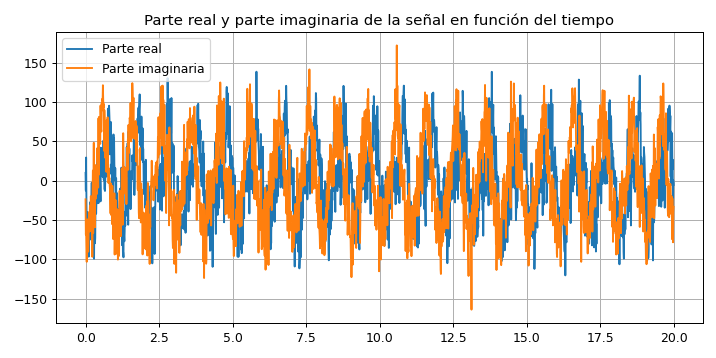

In [5]:
import matplotlib.pyplot as plt
%matplotlib notebook
p_real = np.real(x)
p_imag = np.imag(x)
t = np.arange(0, duracion, step=1./Fs); 
fig, ax = plt.subplots(figsize=(8,4), tight_layout=True)
ax.grid()
ax.plot(t, p_real, label='Parte real')
ax.plot(t, p_imag, label='Parte imaginaria')
ax.legend()
ax.set_title("Parte real y parte imaginaria de la señal en función del tiempo")
plt.show()

- Una nube de puntos (`plt.scatter`) con la parte imaginaria de la señal en función de la parte real de la misma


<IPython.core.display.Javascript object>


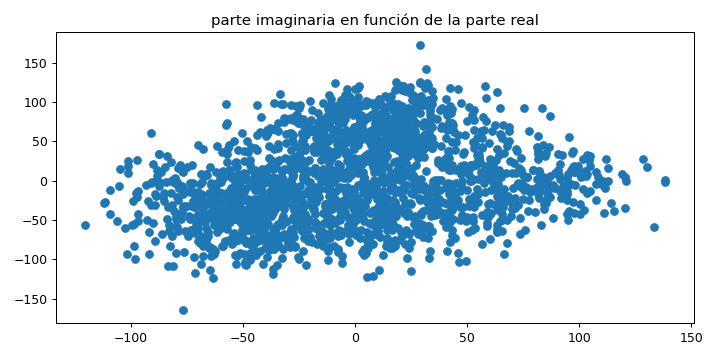

In [6]:
fig, ax = plt.subplots(figsize=(8,4), tight_layout=True)
ax.scatter(p_real, p_imag)
ax.set_title("parte imaginaria en función de la parte real")
plt.show()

- Describa y clasifique la señal según los comportamientos que observa

Se ve un elefante cruelmente asesinado por cazadores furtivos 😢

## Pregunta 2: Análisis de Fourier (40%)

- Escriba una función que reciba la señal y retorne el espectro de amplitud, el espectro de fase y las frecuencias asociadas a la señal. 




>
>Sea la transformada de Fourier de una función general $s(t)$
>
>Llamamos a $S(\omega)$ el espectro de $s(t)$ 
>
>El espectro es un número complejo que podemos escribir en notación polar como
>
>$$
S(\omega) = |S(\omega)| e^{j\Phi(\omega)},
$$
>
>donde $|S(\omega)|$ se conoce como **espectro de amplitud** y $\Phi(\omega)$ como **espectro de fase**

In [7]:
import scipy.fft as sfft
#el resultado de -fft()- viene de la forma
#[1, 2, 3, -3, -2, 1]
#aplicar shift y retornar o asi no mas?
def espectros(s, Fs):
    S = sfft.fft(s)
    #espectro de apmplitud
    SA = np.absolute(S)        
    #fases
    SP = np.angle(S)
    freqs = sfft.fftfreq(len(S), 1/Fs)
    return [SP, SA, freqs]

- Muestre dos gráficos con el espectro de amplitud y espectro de fase en función de la frecuencia, respectivamente. Comente sobre lo que observa


<IPython.core.display.Javascript object>


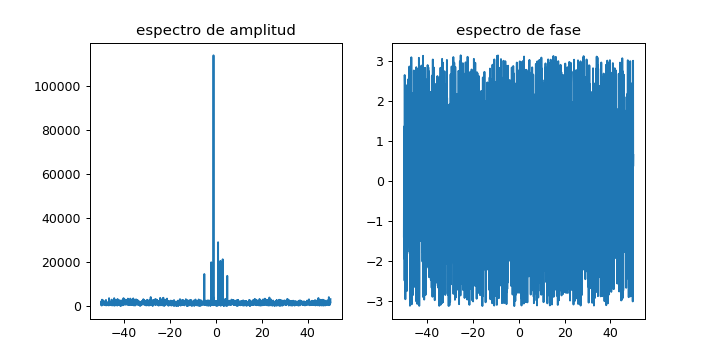

In [8]:
SP, SA, freqs = *espectros(x, Fs),
fig, ax = plt.subplots(1, 2, figsize=(8,4))
#en el video Tutorial de scipy.fft (actividad 1)
#el profe dice que las amplitudes estan escaladas y
#en una ocasion las divide por 100 para mostrar su valor real
#supomgo que el 100 es N/2 pero no se de donde sale
ax[0].plot(sfft.fftshift(freqs),
           sfft.fftshift(SA))
ax[0].set_title('espectro de amplitud')
ax[1].plot(sfft.fftshift(freqs),
           sfft.fftshift(SP))
ax[1].set_title('espectro de fase')
plt.show()

- Escriba una función que reciba un número entero $M$ y que retorne un espectro de magnitud modificado donde los $M$ componentes mayores se mantienen y todos los demás se hacen igual a cero, retorne también el índice de los $M$ componentes mayores


In [9]:
def m_mayores(SA, M):
    #tomar los M componentes mayores
    idxs = np.argsort(SA)[-M:]
    #ndarray de puros ceros
    modified_SA = np.zeros_like(SA)
    #reemplazar por los M componentes seleccionados donde corresponda
    modified_SA[idxs] = SA[idxs]
    #retornar espectro modificado y los indices
    return [modified_SA, idxs]

- Muestre graficamente el espectro de magnitud modificado con $M=7$. Imprima los valores de las **frecuencias, amplitudes y fases** de los $M$ componentes ordenados en orden descedente según su amplitud

In [10]:
#mostrar espectro shifteado?
M = 7
M_SA, idxs = *m_mayores(SA, M),

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(sfft.fftshift(freqs),
        sfft.fftshift(M_SA))
ax.set_title(f'Espectro de amplitud modificado\n'
            +f'M = {M} mayores amplitudes')
plt.show()


<IPython.core.display.Javascript object>

In [11]:
M_comps = np.empty(shape=(M, 3))
#cambiar el orden de los indices a descendente
idxs = np.flip(idxs)
#freqs
M_comps[:, 0] = freqs[idxs]
#amplitudes
M_comps[:, 1] = SA[idxs]
#fases
M_comps[:, 2] = SP[idxs]
np.set_printoptions(precision=3, suppress=True)
print("[    FREQ   |  AMPLITUD  |   FASE ]")
print(M_comps)

[    FREQ   |  AMPLITUD  |   FASE ]
[[    -1.    114172.075     -1.299]
 [     1.     29095.711     -2.829]
 [     3.     21326.973     -3.04 ]
 [     2.     20598.952      1.136]
 [    -2.     19964.342     -1.996]
 [    -5.     14630.203      0.107]
 [     5.     13788.415      0.041]]


## Pregunta 3: Reconstrucción (40%)

Use la transformada de Fourier inversa para reconstruir la señal en base al espectro de amplitud modificado y el espectro de fase. 

Para $M=[100, 10, 7, 5, 3, 1]$ (puede usar otros valores si lo considera necesario en su análisis) muestre

- Una gráfica de linea (`plt.plot`) con las partes real e imaginaria de la señal reconstruida en función del tiempo
- Una nube de puntos (`plt.scatter`) con la parte imaginaria en función de la parte real de la señal reconstruida

Describa y comente lo que observa, en particular compare cada resultado con el caso `M=len(x)` (caso original) y discuta sobre lo que ocurre para $M>7$, $M=7$ y $M<7$ con respecto al ruido y la información relevante de la señal ¿Pueden ver al elefante en el ruido? 

In [27]:
def graficar_a(axis, REAL, IMAG, M):
    global t
    a = len(t) // 3
    b = 2 * a
    axis.plot(t[a:b], REAL[a:b], label='Parte real')
    axis.plot(t[a:b], IMAG[a:b], label='Parte imaginaria')
    axis.set_xlabel('tiempo')
    axis.set_ylabel('y')
    axis.legend()
    #xd
    axis.set_title(f"                Señal reconstruida con los {M} mayores componentes.")

In [29]:
import matplotlib.image as mpimg

def graficar_b(axis, REAL, IMAG, M):
    #img = mpimg.imread('xd.png')
    #if (M != 7):
    axis.scatter(IMAG, REAL)
    #else:
    #axis.imshow(img)
    axis.set_xlabel('parte real')
    axis.set_ylabel('parte imaginaria')

<IPython.core.display.Javascript object>


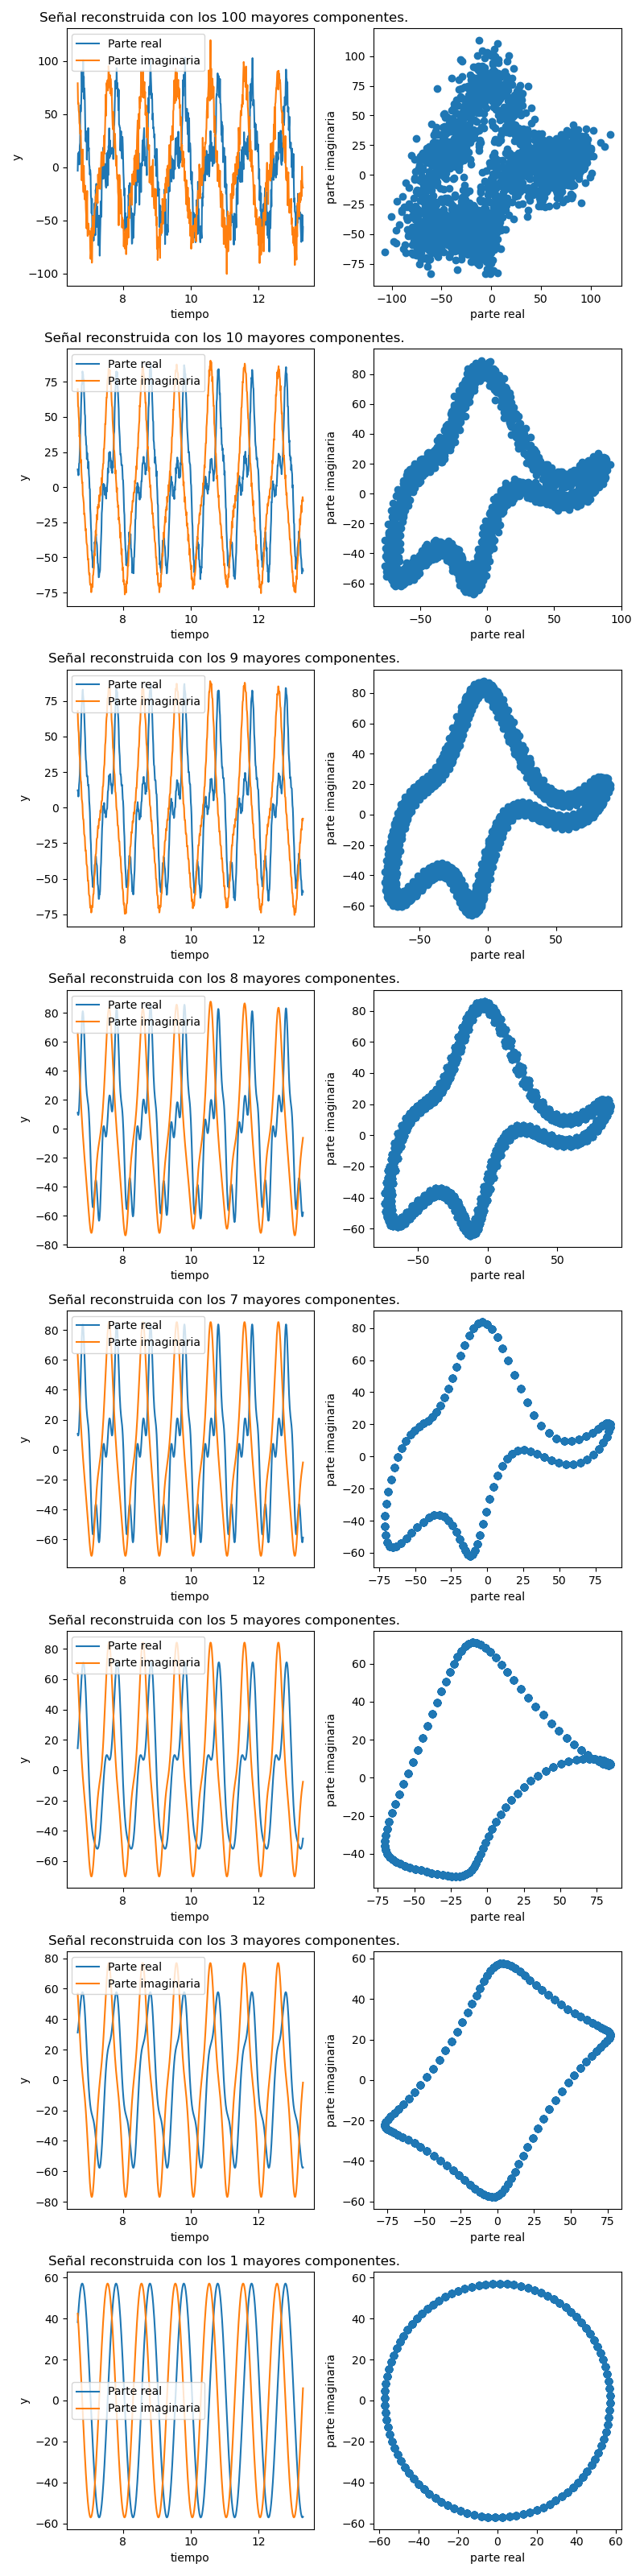

In [30]:
try:
    plt.close(fig)
except NameError:
    pass
Ms = [100,10,9, 8, 7,5,3,1]
fig, ax = plt.subplots(len(Ms), 2, figsize=(8, 4*len(Ms)), tight_layout=True)
for i, M in enumerate(Ms):
    #filtrar
    M_SA = m_mayores(SA, M)[0]
    #reconstruir
    M_s = M_SA * np.exp(1j * SP)
    IS = sfft.ifft(M_s)
    p_real = np.real(IS)
    p_imag = np.imag(IS)
    graficar_a(ax[i, 0], p_real, p_imag, M)
    graficar_b(ax[i, 1], p_real, p_imag, M)
    plt.show()
    

## Indicaciones

- Puede usar las funciones `np.real` e `np.imag` para obtener la parte real e imaginaria de un número complejo, respectivamente
- Si `x` y `y` son la parte real e imaginaria de un número complejo, puedes reconstruir el número complejo con `c = x + 1j*y`
- Si `rho` y `phi` son la amplitud y ángulo de un número complejo, puedes reconstruir el número complejo usando `c = rho*np.exp(1j*phi)`
- Recuerden que un slice de un `ndarray` no es una copia sino una referencia. Para crear copias use el atributo `.copy()`
- Usa `scipy.fft.fft` y `scipy.fft.ifft` para calcular la FFT directa e inversa, respectivamente

## Éxito!

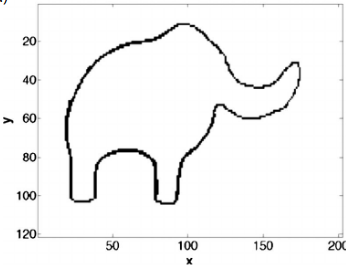